In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('./drinks.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

결측값이 발생하는 경우

1. 조사를 못한 부분이어서 Null
2. None을 의미하는 Null
3. 우연히 실제 데이터와 Null을 의미하는 문자가 겹쳤을 때

In [5]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [7]:
df['continent'] = df['continent'].fillna('NA')  # North America

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [9]:
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


# 상관계수

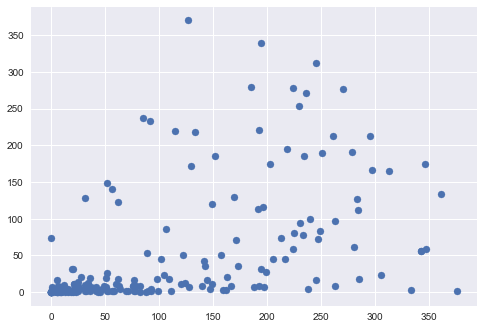

In [10]:
plt.scatter(df['beer_servings'], df['wine_servings'])
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='beer_servings', ylabel='wine_servings'>

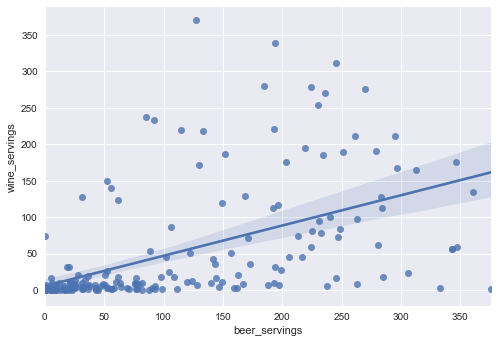

In [11]:
sns.regplot(df['beer_servings'], df['wine_servings'])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='beer_servings', ylabel='beer_servings'>

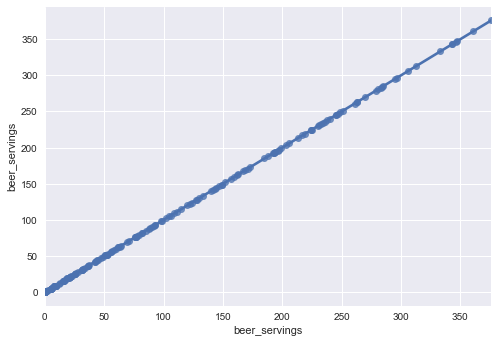

In [12]:
sns.regplot(df['beer_servings'], df['beer_servings'])

In [13]:
df[['beer_servings', 'wine_servings']].corr()

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [14]:
df.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


# 히트맵

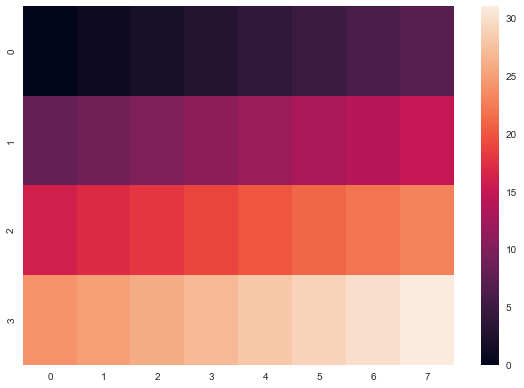

In [15]:
sns.heatmap(np.arange(4 * 8).reshape(4, 8))
plt.tight_layout()
plt.show()

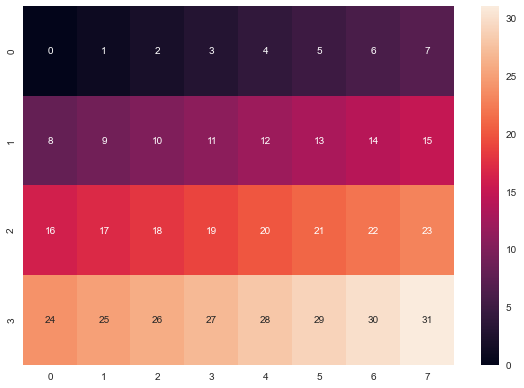

In [16]:
sns.heatmap(np.arange(4 * 8).reshape(4, 8),
            annot=True)
plt.tight_layout()
plt.show()

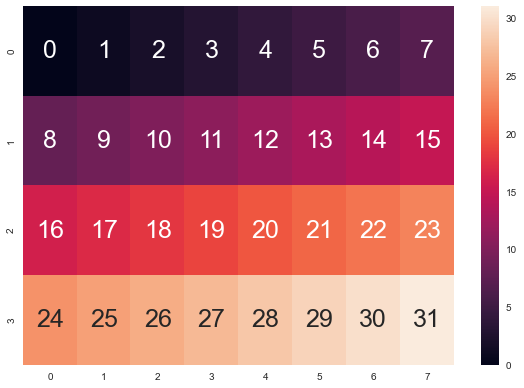

In [17]:
sns.heatmap(np.arange(4 * 8).reshape(4, 8),
            annot=True, annot_kws={'size': 25})
plt.tight_layout()
plt.show()

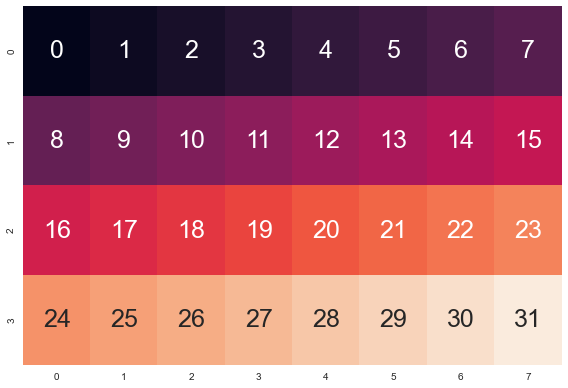

In [18]:
sns.heatmap(np.arange(4 * 8).reshape(4, 8),
            annot=True, annot_kws={'size': 25},
            cbar=False)
plt.tight_layout()
plt.show()

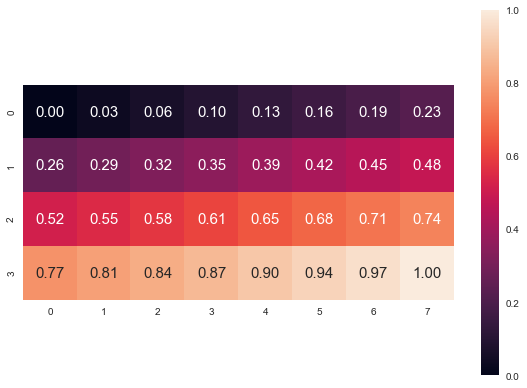

In [19]:
sns.heatmap(np.linspace(0, 1, 32).reshape(4, 8),
            annot=True, annot_kws={'size': 15},
            square=True, fmt='.2f')
plt.tight_layout()
plt.show()

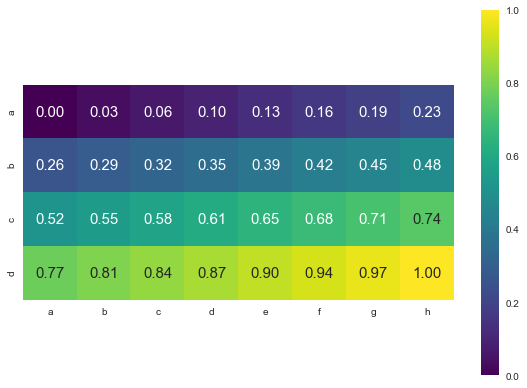

In [20]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
sns.heatmap(np.linspace(0, 1, 32).reshape(4, 8),
            annot=True, annot_kws={'size': 15},
            square=True, fmt='.2f',
            xticklabels="abcdefgh",
            yticklabels="abcd",
            cmap='viridis'
            )
plt.tight_layout()
plt.show()

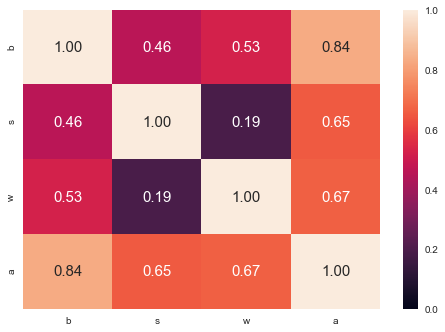

In [21]:
sns.heatmap(df.corr(),
            vmin=0, vmax=1,
            xticklabels='bswa',
            yticklabels='bswa',
            annot=True,
            annot_kws={'size': 15},
            fmt='.2f'
            )
plt.show()

# 산점도

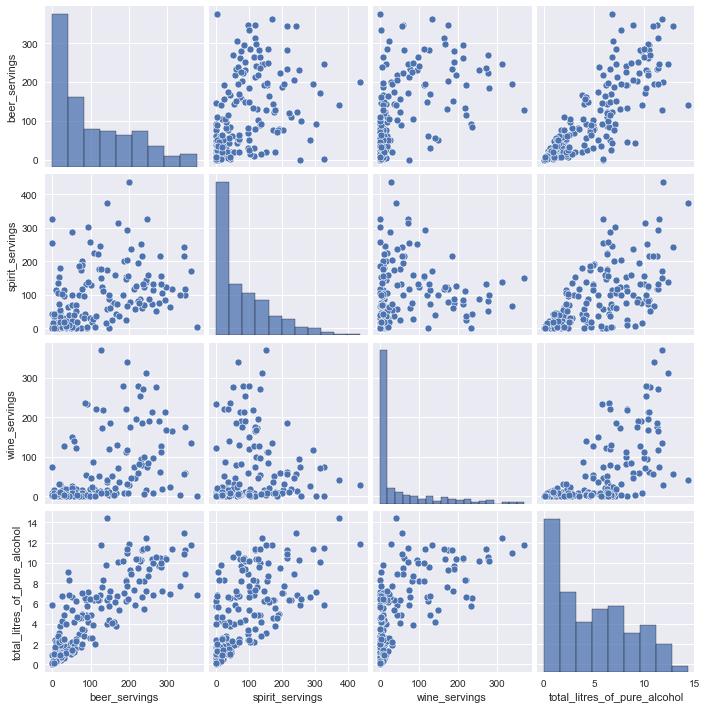

In [22]:
sns.pairplot(df)
plt.show()

# 파이 차트

In [23]:
sig = lambda x: 1 / (1 + np.exp(-x))
data = sig(np.random.randn(6))

In [24]:
data

array([0.76041973, 0.59877932, 0.62587709, 0.62981683, 0.6684701 ,
       0.16660305])

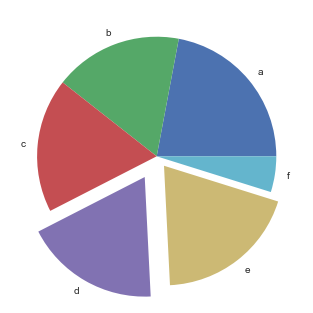

In [25]:
plt.pie(data,
        explode=[0, 0, 0, .2, .1, 0],
        labels='abcdef')
plt.show()

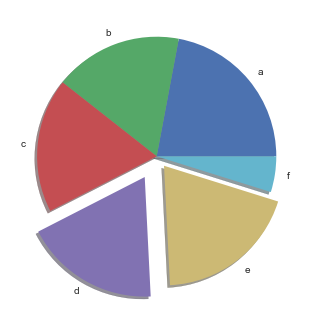

In [26]:
plt.pie(data,
        explode=[0, 0, 0, .2, .1, 0],
        labels='abcdef',
        shadow=True)
plt.show()

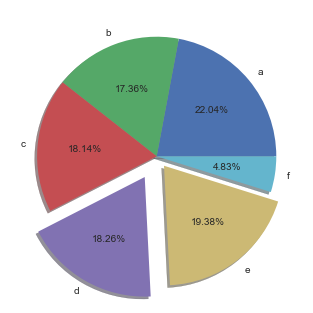

In [27]:
plt.pie(data,
        explode=[0, 0, 0, .2, .1, 0],
        labels='abcdef',
        shadow=True,
        autopct='%.2f%%')
plt.show()

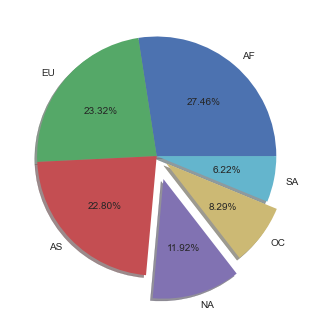

In [28]:
continent_amount = df.continent.value_counts()
plt.pie(continent_amount.values,
        explode=[0, 0, 0, .2, .1, 0],
        labels=continent_amount.index,
        shadow=True,
        autopct='%.2f%%')
plt.show()

# 통계 -> 그래프

<AxesSubplot:xlabel='continent'>

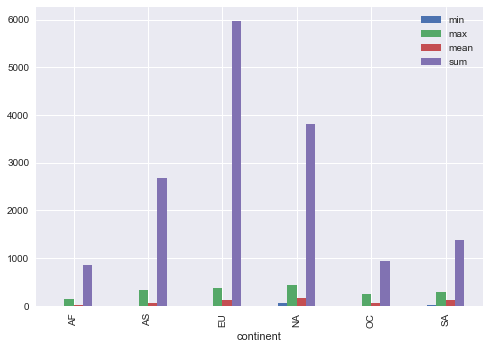

In [29]:
df.groupby('continent').spirit_servings.agg(['min', 'max', 'mean', 'sum']).plot(kind='bar')

In [30]:
# 전체평균보다 / 많은 알코올을 섭취하는 대륙
mean_by_continent = df.groupby('continent').total_litres_of_pure_alcohol.mean()
mean_by_continent[mean_by_continent > df.total_litres_of_pure_alcohol.mean()]

continent
EU    8.617778
NA    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [31]:
# 평균 beer_servings가 / 가장 높은 대륙?
df.groupby('continent').beer_servings.mean().idxmax()

'EU'

In [32]:
# 대륙별 total_litres_of_pure_alcohol을 시각화
mean_of_all = mean_by_continent.loc[:]
mean_of_all['ALL'] = mean_by_continent.mean()

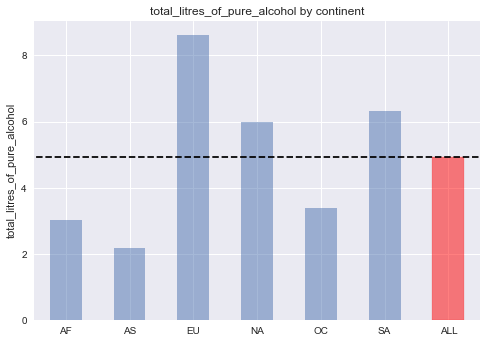

In [33]:
axes = mean_of_all.plot(kind='bar', alpha=0.5)
axes.containers[0][-1].set_color('r')
plt.plot([-2, 8], [mean_of_all.ALL] * 2, 'k--')
plt.xlabel('')
plt.ylabel('total_litres_of_pure_alcohol')
plt.xticks(rotation=0)
plt.title('total_litres_of_pure_alcohol by continent')
plt.show()

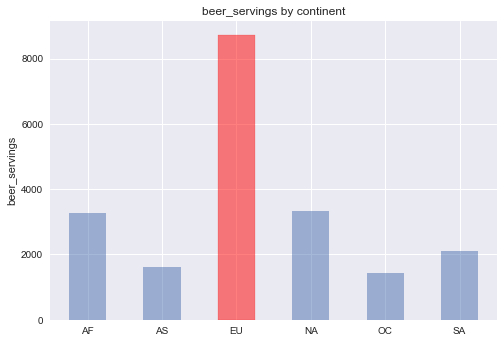

In [34]:
# 대륙별 beer_servings 시각화
sum_of_beer_servings = df.groupby('continent').beer_servings.sum()
axes = sum_of_beer_servings.plot(kind='bar', alpha=0.5)
axes.containers[0][sum_of_beer_servings.index.get_loc('EU')].set_color('r')
plt.xlabel('')
plt.ylabel('beer_servings')
plt.xticks(rotation=0)
plt.title('beer_servings by continent')
plt.show()

In [35]:
# 새로운 칼럼 추가
df['total_servings'] = df['beer_servings'] + df['wine_servings'] + df['spirit_servings']
df['alcohol_rate'] = df['total_litres_of_pure_alcohol'] / df['total_servings']

In [36]:
df.isnull().sum()  # 0으로 나눠서 생김

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                        0
total_servings                   0
alcohol_rate                    13
dtype: int64

In [37]:
df['alcohol_rate'] = df['alcohol_rate'].fillna(0)

In [38]:
country_with_rank = df[['country', 'alcohol_rate']].sort_values(by='alcohol_rate', ascending=False)

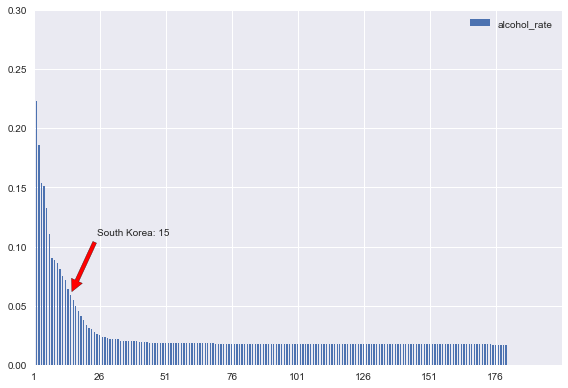

In [39]:
country_with_rank.plot(kind='bar')
korea_rank = country_with_rank.country.tolist().index('South Korea')
korea_alc_rate = country_with_rank.iloc[korea_rank].alcohol_rate
plt.xticks(np.arange(0, len(country_with_rank), 25), np.arange(1, len(country_with_rank), 25), rotation=0)
plt.annotate(f'South Korea: {korea_rank + 1}',
             xy=(korea_rank, korea_alc_rate),
             xytext=(korea_rank + 10, korea_alc_rate + .05),
             arrowprops={'facecolor': 'red', 'shrink': 0.05})  # shrink = 꼬리 길이
plt.axis([0, 200, 0, 0.3])
plt.tight_layout()
plt.show()

In [40]:
# 전체평균보다 적은 알코올을 섭취하는 대륙 중에서 / beer를 가장 많이 마시는 국가를 찾으세요
total_mean_by_continent = df.groupby('continent').total_litres_of_pure_alcohol.mean()

df[df.continent.isin(
    total_mean_by_continent[total_mean_by_continent <= df.total_litres_of_pure_alcohol.mean()].index
)].sort_values(by='beer_servings', ascending=False)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
117,Namibia,376,3,1,6.8,AF,380,0.017895
62,Gabon,347,98,59,8.9,AF,504,0.017659
129,Palau,306,63,23,6.9,OC,392,0.017602
8,Australia,261,72,212,10.4,OC,545,0.019083
141,Russian Federation,247,326,73,11.5,AS,646,0.017802
...,...,...,...,...,...,...,...,...
103,Maldives,0,0,0,0.0,AS,0,0.000000
149,Saudi Arabia,0,5,0,0.1,AS,5,0.020000
107,Mauritania,0,0,0,0.0,AF,0,0.000000
128,Pakistan,0,0,0,0.0,AS,0,0.000000
